A **histogram** is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plotting one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot the histograms. There is a mild variation in the specifics, such as plotting the Gaussian-estimation line along with bars in Seaborn's displot(), and the arguments that you can use in either case.

## Matplotlib.pyplot.hist()

You can use the default settings for matplotlib's [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function to plot a histogram with 10 bins:

## Example 1. Plot a default histogram

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pokemon = pd.read_csv('data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

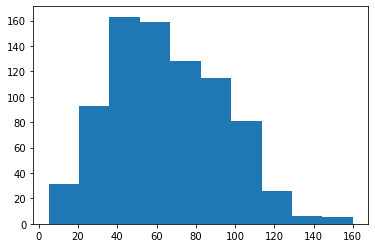

In [3]:
# We have intentionally not put a semicolon at the end of the statement below to see the bar-width
plt.hist(data = pokemon, x = 'speed')

You can see a non-uniform distribution of data points in different bins.

Overall, a generally bimodal distribution is observed (one with two peaks or humps). The direct adjacency of the bars in the histogram, in contrast to the separated bars in a bar chart, emphasizes the fact that the data takes on a continuous range of values. When a data value is on a bin edge, it is counted in the bin to its right. The exception is the rightmost bin edge, which places data values equal to the uppermost limit into the right-most bin (to the upper limit's left).

By default, the `hist` function divides the data into 10 bins, based on the range of values taken. In almost every case, we will want to change these settings. Usually, having only ten bins is too few to really understand the distribution of the data. And the default tick marks are often not on nice, 'round' values that make the ranges taken by each bin easy to interpret.

Wouldn't it be better if I said "between 0 and 2.5" instead of "between about 0 and 2.5", and "from 2.5 to 5" instead of "from about 2.5 to 5" above?

You can use descriptive statistics (e.g. via **[dataframe['column'].describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html)** to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange(opens in a new tab) function:

## Example 2. Histogram with fixed number of bins

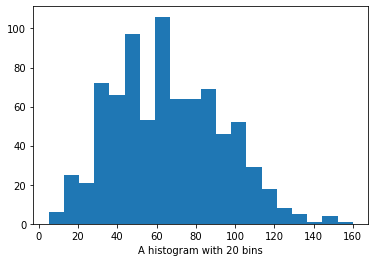

In [6]:
plt.hist(data=pokemon, x='speed', bins=20);
plt.xlabel('A histogram with 20 bins');

## Example 3. Histogram with dynamic number of bins

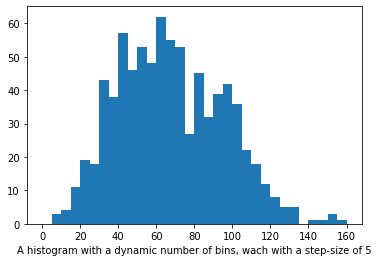

In [5]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bins);
plt.xlabel('A histogram with a dynamic number of bins, wach with a step-size of 5');

## Alternative Approach - Seaborn's displot()

This function can also plot histograms, as similar to the `pyploy.hist()` function, and is integrated with other univariate plotting functions. This is in contrast to our ability to specify a data source and column as separate arguments, like we've seen with and `countplot` and `hist`.

The basic syntax is:
`seaborn.distplot(Series, bins, kde, hist_kws)`

There are many other arguments that you can explore in the [syntax definition](https://seaborn.pydata.org/generated/seaborn.distplot.html).

## Example 4. Plot the similar histogram with Seaborn's distplot()

<AxesSubplot:xlabel='speed', ylabel='Density'>

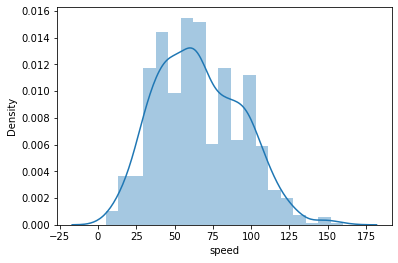

In [8]:
sns.distplot(pokemon['speed'])

C:\Users\biodu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed'>

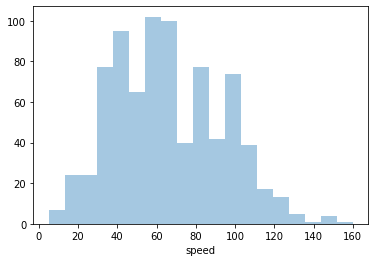

In [9]:
# Set the argument `kde=False` to remove the estimate-line representing the Gaussian kernel density estimate.
sns.distplot(pokemon['speed'], kde=False)

## Plot two histograms side-by-side

When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with the identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

Let's see a new example demonstrating a few new functions, `pyplot.subplot()` and `pyplot.figure()`. *We will learn more in the upcoming concepts.*

## Example 5. Plot two histograms side-by-side

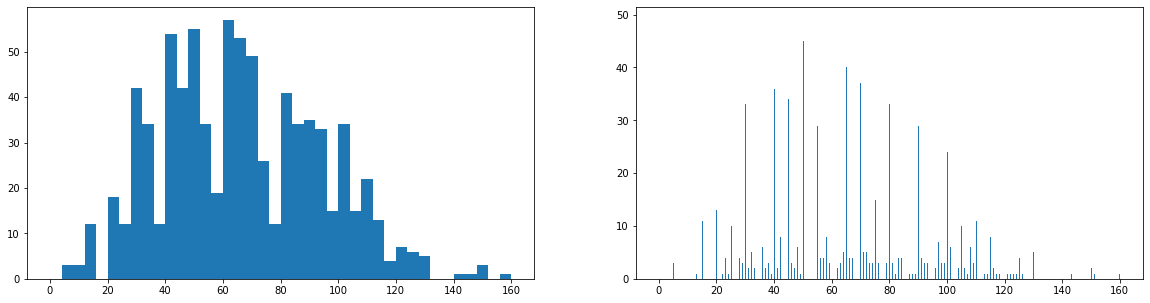

In [12]:
# Resize the chart, and have two plots side-by-side
# Set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

This example puts two plots side by side through use of the [`subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function, whose arguments specify the number of rows, columns, and index of the active subplot (in that order). The [`figure()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) function is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots. (More details on figures and subplots are coming up next in the lesson.)

#### Summary of Histograms
In summary, if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by distplot, then you might be better off with just using Matplotlib's hist function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.

# Figures, Axes, and Subplots

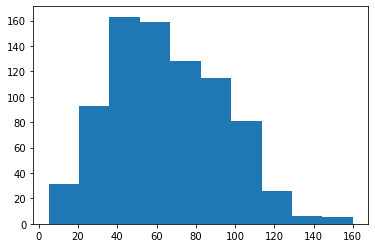

In [13]:
plt.hist(data=pokemon, x='speed');

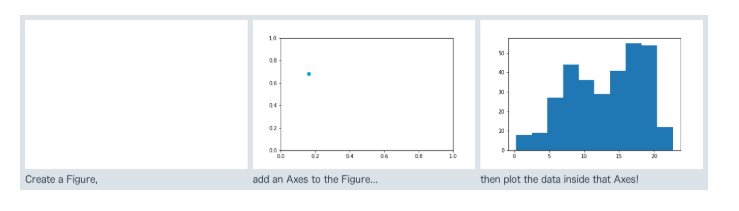Since we don't have a Figure area to plot inside, Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

![creating a matplotlib figure](../images/matplotlib_graph_illustration.png)

## Example 2. Demonstrate figure.add_axes() and axes.hist()

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

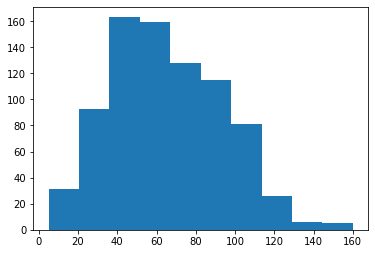

In [5]:
# Create a new figure
fig = plt.figure()

# The argument of add_axes represents the dimensions [left, bottom, width, height] of the new axes. 
# All quantities are in fractions of figure width and height.
ax = fig.add_axes([.125, .125, .775, .775])
ax.hist(data=pokemon, x='speed')

[figure()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) creates a new Figure object, a reference to which has been stored in the variable `fig`. One of the Figure methods is [.add_axes()](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_axes), which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable `ax`. Finally, we use the Axes method [.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html#matplotlib.axes.Axes.hist) just like we did before with `plt.hist()`.

## Example 3. Use axes with seaborn.countplot()

<Axes:xlabel='generation_id', ylabel='count'>

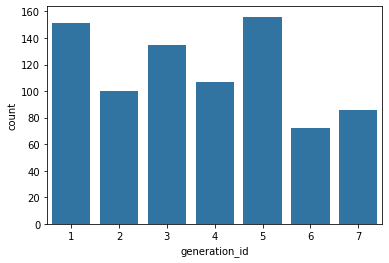

In [8]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sns.color_palette()[0]
sns.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax)

## Example 3. Sub-plots

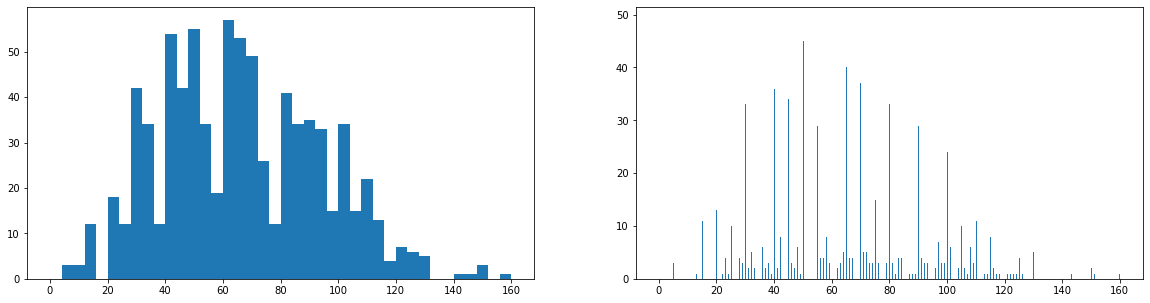

In [9]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

First of all, `plt.figure(figsize = [20, 5])` creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 20 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, `plt.subplot(1, 2, 1)` creates a new Axes in our Figure, its size determined by the `subplot()` function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that Axes as the current Axes, so when the `plt.hist()` call comes, the histogram is plotted in the left-side subplot.

Finally, `plt.subplot(1, 2, 2)` creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next `plt.hist()` call comes, the histogram gets drawn in the right-side subplot.

## Additional Techniques

If you don't assign Axes objects as they're created, you can retrieve the current Axes using [ax = plt.gca()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html), or you can get a list of all Axes in a Figure `fig` by using axes = [fig.get_axes()](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.get_axes). As for creating subplots, you can use [fig.add_subplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot) in the same way as `plt.subplot()` above. If you already know that you're going to be creating a bunch of subplots, you can use the [plt.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function:

## Example 4. Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots

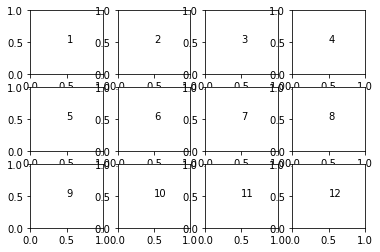

In [10]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

As a special note for the text, the Axes limits are [0,1] on each Axes by default, and we increment the iterator counter `i` by 1 to get the subplot index, if we were creating the subplots through `subplot()`. (Reference: [plt.sca()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.sca.html), [plt.text()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html))